In [ ]:
# Importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [ ]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
# Rows and Columns in Train.csv
print(train.shape)

(891, 12)


In [ ]:
# Rows and Columns in Test.csv
print(test.shape)

(418, 11)


In [ ]:
# How many people survived and how many did not
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Gender       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
# Getting to know how many features are currently there
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Filling the missing values with the mode and mean
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
# Created 2 new features where sex and embarked are integers
train['Gender'] = train['Sex'].replace({'male': 0, 'female': 1})
train['Sailed_from'] = train['Embarked'].replace({'S' : 0, 'C': 1, 'Q': 2})
test['Gender'] = test['Sex'].replace({'male': 0, 'female': 1})
test['Sailed_from'] = test['Embarked'].replace({'S' : 0, 'C': 1, 'Q': 2})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Gender       891 non-null    int64  
 11  Sailed_from  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
# dropping unnecessary values
train.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

<ipython-input-85-e4e6050f22fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survived_corr = train.corr()


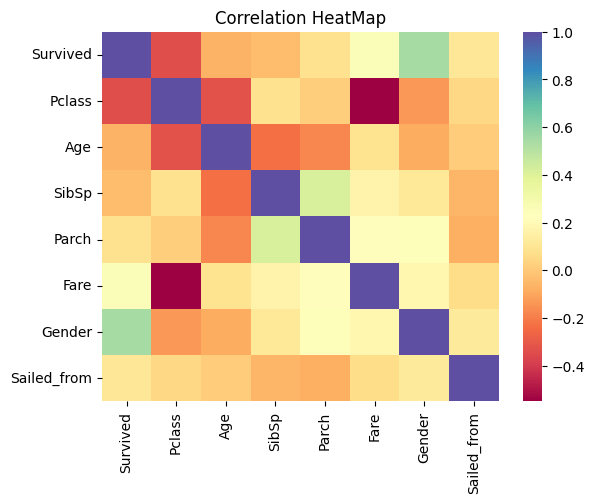

In [ ]:
# Using Heatmap to see correlation between survived feature and other features
survived_corr = train.corr()
sns.heatmap(survived_corr, cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()
# Observation: Survived feature is lessly related to Pclass but is more related to gender

In [ ]:
# Calculate Pearson correlation
pearson_corr = train['Survived'].corr(train['Survived'], method='pearson')
print("Pearson Correlation Survived:", pearson_corr)
pearson_corr = train['Survived'].corr(train['Pclass'], method='pearson')
print("Pearson Correlation Pclass:", pearson_corr)
pearson_corr = train['Survived'].corr(train['Age'], method='pearson')
print("Pearson Correlation Age:", pearson_corr)
pearson_corr = train['Survived'].corr(train['Gender'], method='pearson')
print("Pearson Correlation Gender:", pearson_corr)
pearson_corr = train['Survived'].corr(train['Sailed_from'], method='pearson')
print("Pearson Correlation Sailed_from:", pearson_corr)
pearson_corr = train['Survived'].corr(train['SibSp'], method='pearson')
print("Pearson Correlation Survived SibSp:", pearson_corr)

Pearson Correlation Survived: 1.0
Pearson Correlation Pclass: -0.3384810359610148
Pearson Correlation Age: -0.06980851528714314
Pearson Correlation Gender: 0.5433513806577555
Pearson Correlation Sailed_from: 0.10681138570891928
Pearson Correlation Survived SibSp: -0.03532249888573564


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Gender       891 non-null    int64  
 11  Sailed_from  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
# Making a main dataset for training
train_main = train.drop(['Ticket','Embarked','Sex','Name'], axis=1)


In [ ]:
X = train_main.drop('Survived', axis=1)
Y = train_main['Survived']
X_testss = test.drop(['Ticket','Embarked','Sex','Name','PassengerId', 'Cabin'], axis = 1)
scalar = StandardScaler()
X_test_scale = scalar.fit_transform(X_testss)
X_scale  = scalar.fit_transform(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Gender       891 non-null    int64  
 6   Sailed_from  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
X_train ,X_test, Y_train, Y_test = train_test_split(X_scale,Y, test_size=0.2,random_state=1)

model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.score(X_test, Y_test)

0.7988826815642458

In [ ]:
survived_test = model.predict(X_test_scale)
basic_submission = {'PassengerId' : test.PassengerId, 'Survived' : survived_test}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('submission.csv', index = False)
base_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
